<h1>Time Series of Price Anomaly Detection</h1>
<p>Anomaly detection detects data points in data that does not fit well
with the rest of the data.<p>

<p>Prepared by Vytautas Bielinskas, Feb 2019.</p>

In [2]:
# Import packages and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

<p><i>Note:</i> other modules for each clustering or other Machine Learning model will be imported later for specific section.</p>

In [3]:
# Set data directory
DIR='./data/data'
FILE='/train.csv'

file='{}{}'.format(DIR, FILE)

print('File directory: {}'.format(file))

File directory: ./data/data/train.csv


In [4]:
# Read the head of the raw dataset
print(pd.read_csv(file, nrows=2))

   srch_id            date_time  site_id  visitor_location_country_id  \
0        1  2013-04-04 08:32:15       12                          187   
1        1  2013-04-04 08:32:15       12                          187   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                      NaN                   NaN              219      893   
1                      NaN                   NaN              219    10404   

   prop_starrating  prop_review_score      ...       comp6_rate_percent_diff  \
0                3                3.5      ...                           NaN   
1                4                4.0      ...                           NaN   

   comp7_rate  comp7_inv  comp7_rate_percent_diff  comp8_rate  comp8_inv  \
0         NaN        NaN                      NaN           0          0   
1         NaN        NaN                      NaN           0          0   

   comp8_rate_percent_diff  click_bool  gross_bookings_usd  booking_bool  


In [4]:
# Create a connector to a database
csv_database=create_engine('sqlite:///csv_database.db')

In [5]:
# Building the Database by chunking
chunksize=200000
i=0
j=1

for df in pd.read_csv(file, chunksize=chunksize, iterator=True):
    df=df.rename(columns={c: c.replace(' ', '') for c in df.columns})
    df.index += j
    i+=1
    df.to_sql('data_use', csv_database, if_exists='append')
    j=df.index[-1]+1
    
    print('| index: {}'.format(j))

| index: 200001
| index: 600001
| index: 1200001
| index: 2000001
| index: 3000001
| index: 4200001
| index: 5600001
| index: 7200001
| index: 9000001
| index: 11000001
| index: 13200001
| index: 15600001
| index: 18200001
| index: 21000001
| index: 24000001
| index: 27200001
| index: 30600001
| index: 34200001
| index: 38000001
| index: 42000001
| index: 46200001
| index: 50600001
| index: 55200001
| index: 60000001
| index: 65000001
| index: 70200001
| index: 75600001
| index: 81200001
| index: 87000001
| index: 93000001
| index: 99200001
| index: 105600001
| index: 112200001
| index: 119000001
| index: 126000001
| index: 133200001
| index: 140600001
| index: 148200001
| index: 156000001
| index: 164000001
| index: 172200001
| index: 180600001
| index: 189200001
| index: 198000001
| index: 207000001
| index: 216200001
| index: 225600001
| index: 235200001
| index: 245000001
| index: 254917531


<p>For this example let's filter a subset that belong to specific hotel, and for specific number of rooms in search phase in USA.</p>

In [27]:
# Construct the DataFrame for research use from the Database
df=pd.read_sql_query('SELECT * FROM data_use WHERE prop_id=104517 AND srch_room_count=1 AND visitor_location_country_id=219',\
                     csv_database)

In [28]:
df = df[['date_time', 'price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 4 columns):
date_time                   3049 non-null object
price_usd                   3049 non-null float64
srch_booking_window         3049 non-null int64
srch_saturday_night_bool    3049 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 95.4+ KB


In [30]:
df['price_usd'].describe()

count    3049.000000
mean      112.939023
std       113.374049
min         0.120000
25%        67.000000
50%       100.000000
75%       141.000000
max      5584.000000
Name: price_usd, dtype: float64

In [31]:
# Save a subset to an external CSV file with UTF-8 encoding
df.to_csv('Expedia_USA_hotel.csv', encoding='utf-8')

In [5]:
# If the project is being continued after database saved to CSV file
# start analyzing from this checkpoint.

# Load the filtered database
df=pd.read_csv('Expedia_USA_hotel.csv', parse_dates=['date_time'])

In [6]:
# Inspect the dataframe
df.head(4)

,Unnamed: 0,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
0,0,2013-03-14 11:27:28,206.0,99,1
1,1,2013-01-03 20:48:24,186.0,6,0
2,2,2013-01-19 16:51:27,61.0,1,0
3,3,2013-01-26 11:34:23,72.0,116,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 5 columns):
Unnamed: 0                  3049 non-null int64
date_time                   3049 non-null datetime64[ns]
price_usd                   3049 non-null float64
srch_booking_window         3049 non-null int64
srch_saturday_night_bool    3049 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 119.2 KB


In [8]:
# Inspect the Price values in the Dataset
df['price_usd'].describe()

count    3049.000000
mean      112.939023
std       113.374049
min         0.120000
25%        67.000000
50%       100.000000
75%       141.000000
max      5584.000000
Name: price_usd, dtype: float64

<p><i>Comment:</i> At this point, we have detected one extreme anomaly which was the Max price_usd at 5584 USD. In order to find more anomalies that are not extreme, I decided to remove this one.</p>

In [9]:
# Remove some outliers manually
df=df[df['price_usd'] < np.max(df['price_usd'])]

<p>For the futher demonstation we will ignore the question
which type of room was looked for by the visitors.</p>

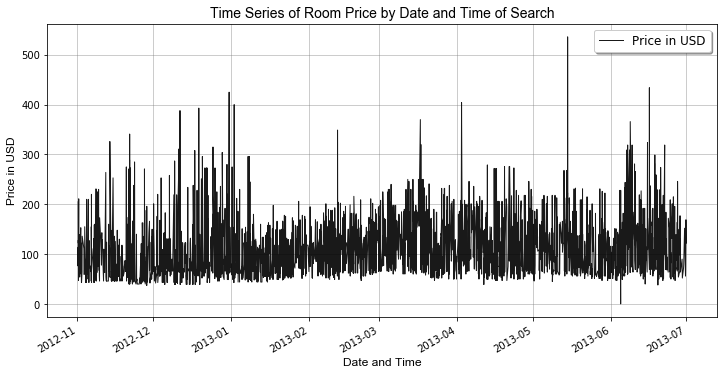

In [11]:
# Time Series Visualization
_ = df.plot(x='date_time', y='price_usd', figsize=(12,6),
           color='black', label='Price in USD',
           linewidth=1, alpha=0.9)
_ = plt.xlabel('Date and Time', family='Arial', fontsize=12)
_ = plt.ylabel('Price in USD', family='Arial', fontsize=12)
_ = plt.title('Time Series of Room Price by Date and Time of Search',
            family='Arial', fontsize=14)
_ = plt.grid(which='major', color='gray', alpha=0.5)
_ = plt.legend(loc='best', fontsize=12, shadow=True)
_ = plt.show()

c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


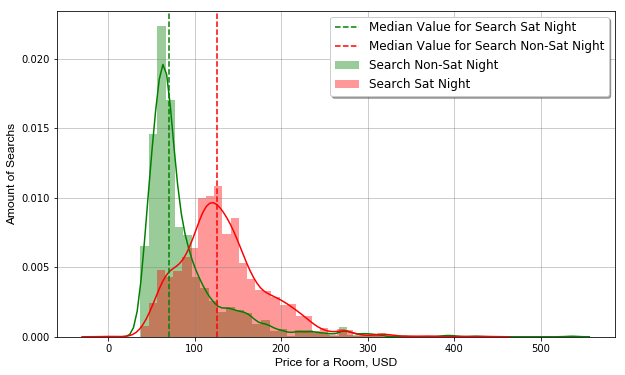

In [12]:
'''
Let's explore, how distributed prices in the case the 
room was checked in Saturday night and in NOT Saturday night.
'''

# Separation of price for a room values based on search time filter
a = df[df['srch_saturday_night_bool'] == 0]['price_usd']
b = df[df['srch_saturday_night_bool'] == 1]['price_usd']

# Visualization the distrubition of a and b
_ = plt.figure(figsize=(10,6))
_ = sns.distplot(a, color='green', label='Search Non-Sat Night')
_ = sns.distplot(b, color='red', label='Search Sat Night')
_ = plt.axvline(x=np.median(a), color='green', linestyle='--',
                label='Median Value for Search Sat Night')
_ = plt.axvline(x=np.median(b), color='red', linestyle='--',
                label='Median Value for Search Non-Sat Night')
_ = plt.legend(loc='upper right', shadow=True, fontsize=12)
_ = plt.xlabel('Price for a Room, USD', family='Arial', fontsize=12)
_ = plt.ylabel('Amount of Searchs', family='Arial', fontsize=12)
_ = plt.grid(which='major', color='gray', alpha=0.5)
_ = plt.show()

<p><i>Comment:</i> In general, the price is more stable and lower when searching Non-Saturday nights. And the price goes up when searching Saturday night. Seems this property gets popular during the weekends. </p>

<h2>Clustering Based Anomaly Detection</h2>

<p>K-means is a widely used clustering algorithm. It creates '<i>k</i>' similar
clusters of data points. Data instances that fall outside of these
groups could potentially be marked as anomalies. Before start k-means
clustering we use elbow method to determne the optimal number of 
clusters.</p>

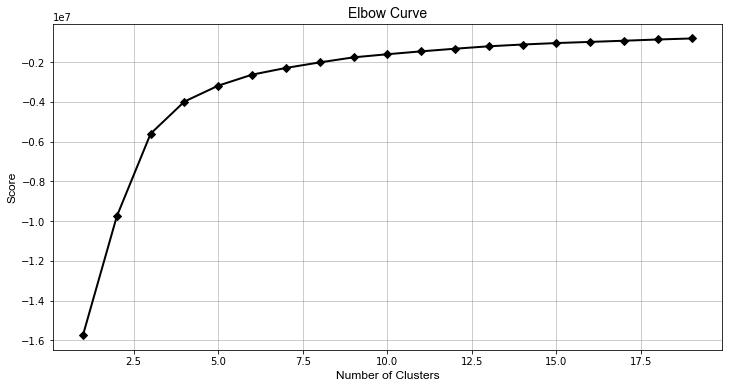

In [17]:
# Import Module for K-Means Clustering
from sklearn.cluster import KMeans

data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
n_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_clusters]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(n_cluster, scores, color='black', linewidth=2, 
        marker='D', markersize=5)
_ = plt.xlabel('Number of Clusters', family='Arial', fontsize=12)
_ = plt.ylabel('Score', family='Arial', fontsize=12)
_ = plt.title('Elbow Curve', family='Arial', fontsize=14)
_ = plt.grid(which='major', color='gray', alpha=0.5)
_ = plt.show()

<p>
    <i>Comment:</i> From the above elbow curve, we see that the graph levels off after 10 clusters, implying that addition of more clusters do not explain much more of the variance in our relevant variable (price_usd)
</p>

In [19]:
# Set value for Number Of Clusters:
n_clusters=10

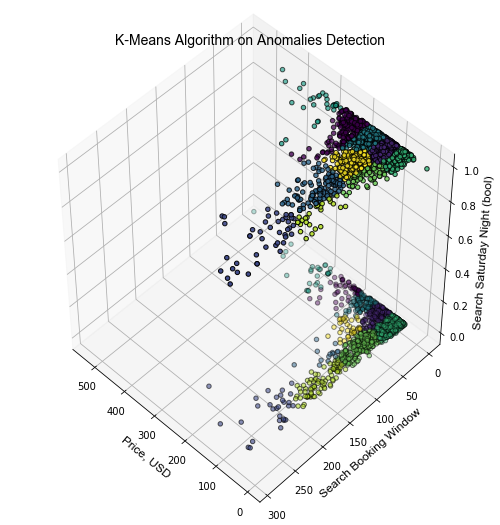

'\nNote:\n    srch_booking_window : Number of days in the future the hotel stay\n    started from the search date.\n'

In [20]:
# Fit Data to the Clustering Model with n_clusters=10
X=df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X=X.reset_index(drop=True)
km=KMeans(n_clusters=10)
km.fit(X)
km.predict(X)

labels = km.labels_

# Visualize 3D clusters
fig=plt.figure(1, figsize=(7, 7))
ax=Axes3D(fig, rect=[0, 0, 0.95, 1],
            elev=48,
            azim=134)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2],
           c=labels.astype(np.float), edgecolor='k')
ax.set_xlabel('Price, USD', family='Arial', fontsize=12)
ax.set_ylabel('Search Booking Window', family='Arial', fontsize=12)
ax.set_zlabel('Search Saturday Night (bool)', family='Arial', fontsize=12)
plt.title('K-Means Algorithm on Anomalies Detection', family='Arial',
          fontsize=14)
plt.show()

'''
Note:
    srch_booking_window : Number of days in the future the hotel stay
    started from the search date.
'''

<p>Next, we have to find out the number of components (features) to keep for the analysis.</p>

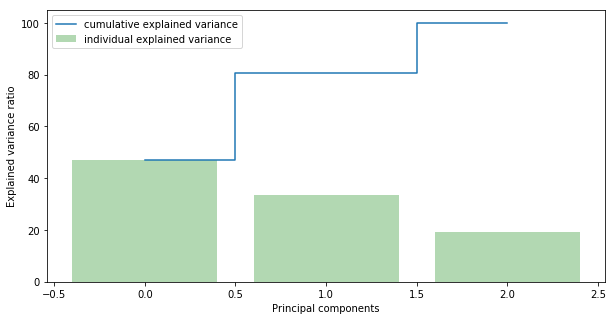

In [21]:
# Import library for StandardScaler
from sklearn.preprocessing import StandardScaler

data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = data.values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and Eigenvalues for Covatiance Matrix
mean_vec=np.mean(X_std, axis=0)
cov_mat=np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs=[ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculating of Explained Variance from the Eigenvalues
tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp=np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

<p>
    First component explains almost <b>50%</b> of the variance. The second component explains over <b>30%</b>. However,
we're got to notice tat almost none of the component are really neglibible. The first 2 components contains over <b>80%</b> of the information. So, I will set <code>n_components=2</code>.</p>

<h2>Clustering Approach</h2>

<p>The underline assumption in the clustering based on the anomal detection is that is we cluster the data, normal data will belong to clusters while anomalies will not belong to any clusters or belong to small clusters I use the following steps to find and visualize anomalies:
    <li>
    <ul>- Calculate the distance between each point and its nearest centroid. The biggest distances are consideredas anomaly.</ul>
    <ul>- Calculate outliers_fraction to provide information to the algorithm about the proportion of the outliers present in our data set. Starting figure <code>outliers_fraction=0.01</code>, since it is the percentage of observations that should fall over the absolute value 3 in <i>Z score</i> distance from the mean in a standardized normal distribution.</ul>
    <ul>- Set threshold as the minimum distance of these outliers.</ul>
        <ul>- The anomaly result of <code>anomaly1</code> contains the above method Cluster (<b>0</b>:<i>normal</i>, <b>1</b>:<i>anomaly</i>)</ul>
    <ul>- Visualize anomalies with cluster view.</ul>
    <ul>- Visualize anomalies with Time Series view.</ul>
    </li>
</p>

In [24]:
from sklearn.decomposition import PCA

# Take useful feature and standardize them
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)

# Reduce to 2 important features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# Standardize these 2 new features
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [25]:
kmeans=[KMeans(n_clusters=i).fit(data) for i in n_cluster]
df['cluster'] = kmeans[9].predict(data)
df.index = data.index
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

0    663
1    593
4    430
5    353
6    353
8    212
9    150
2    149
3     79
7     66
Name: cluster, dtype: int64

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


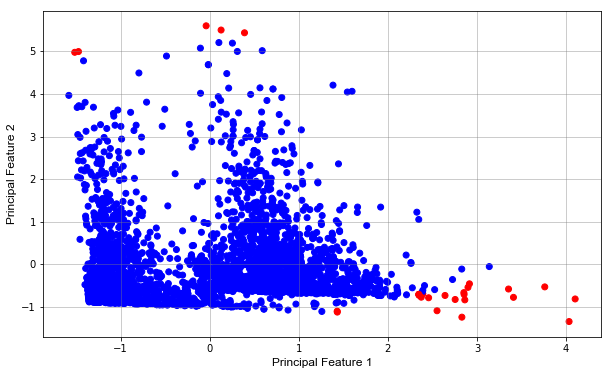

In [33]:
def getDistanceByPoint(data, model):
    distance=pd.Series()
    for i in range(0, len(data)):
        
        #print('>>> {}\n{}'.format(i, data.loc[i]))
        Xa=np.array(data.loc[i])
        Xb=model.cluster_centers_[model.labels_[i]-1]
        #print('Distance: {}.'.format(round(np.linalg.norm(Xa-Xb), 2)))
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

outliers_fraction=0.01

# Get the distance between each point and its nearest centroid. The biggest distances are considered
# as anomaly.
distance=getDistanceByPoint(data, kmeans[9])
number_of_outliers=int(outliers_fraction*len(distance))
threshold=distance.nlargest(number_of_outliers).min()

# anomaly1 contains the anomaly result of the above method Cluster (0: normal, 1:anomaly)
df['anomaly1']=(distance >= threshold).astype(int)

# Visualize of anomaly with cluster view
fig, ax = plt.subplots(figsize=(10,6))
colors={0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'],
           df['principal_feature2'],
           c=df['anomaly1'].apply(lambda x: colors[x]))
plt.grid(which='major', color='grey', alpha=0.5)
plt.xlabel('Principal Feature 1', family='Arial', fontsize=12)
plt.ylabel('Principal Feature 2', family='Arial', fontsize=12)
plt.show()


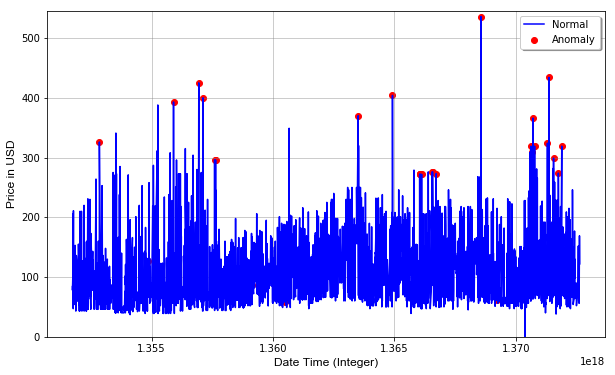

In [45]:
# Visualize anomalies in Time series view
df=df.sort_values('date_time')
df['date_time_int']=df.date_time.astype(np.int64)
fig, ax = plt.subplots(figsize=(10,6))
a=df.loc[df['anomaly1'] == 1, ['date_time_int', 'price_usd']] # anomaly

ax.plot(df['date_time_int'], df['price_usd'], color='blue', label='Normal')
ax.scatter(a['date_time_int'], a['price_usd'], color='red', label='Anomaly')
plt.xlabel('Date Time (Integer)', family='Arial', fontsize=12)
plt.ylabel('Price in USD', family='Arial', fontsize=12)
plt.grid(which='major', color='grey', alpha=0.5)
plt.ylim(0, np.max(df['price_usd']+10))
plt.legend(loc='best', shadow=True)
plt.show()

<p><i>Comment</i>: It seems that the anomalies detected by k-means clustering were either some
of very high rates or some very low rates.</p>

<h2> Isolation Forests From Anomaly Detection</h2>

<p>Isolation Forest detects anomalies purely based on the fact that anomalies are data points that are few and different. The anomalies isolation is implemented without employing any distance or density measure. This method is fundamentally different from clustering based or distance based algorithms.
<li>
    <ul>- When applying <code>IsolationForest</code> model, we set <code>contamination=outlier_fraction</code>, that is telling the model that the proportion of outliers in the data is set to <b>0.01</b>.</ul>
    <ul>- <code>fit</code> and <code>predict(data)</code> performs outlier detection on data, and returns <b>1</b> for <i>normal</i>, <b>-1</b> for <i>anomaly</i>.</ul>
    <ul>- Finally, we visualize anomalies with Time Series view.</ul></li>
</p>

c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


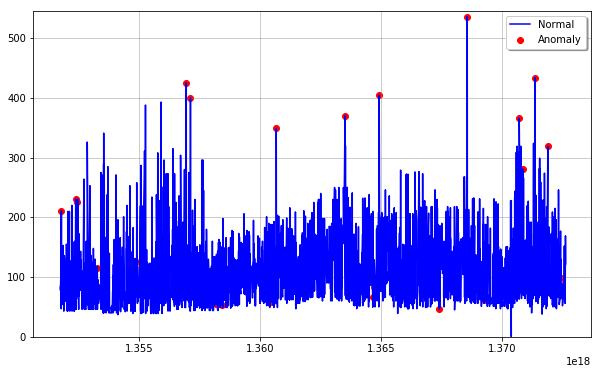

In [49]:
# Import module for oneclassSVM
from sklearn.ensemble import IsolationForest

data=df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

# Scale the Data
scaler=StandardScaler()
np.scaled=scaler.fit_transform(data)
data=pd.DataFrame(np_scaled)

# Train Isolation Forest
model=IsolationForest(contamination=outliers_fraction)
model.fit(data)

df['anomaly2']=pd.Series(model.predict(data))

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

a=df.loc[df['anomaly2'] == -1, ['date_time_int', 'price_usd']] # anomaly

ax.plot(df['date_time_int'], df['price_usd'], color='blue', label='Normal')
ax.scatter(a['date_time_int'], a['price_usd'], color='red', label='Anomaly')
plt.grid(which='major', color='grey', alpha=0.5)
plt.ylim(0, np.max(df['price_usd']+10))
plt.legend(shadow=True, loc='best')
plt.show()

<h2>Support Vector Machine Based Anomaly Detection</h2>
<p>A SVM is typically associated with <i>supervised learning</i>, but <code>OneClassSVM</code> can be used to identify anomalies as an <i>unsupervised</i> problems that learns a decision function for anomaly detection: <u>classifying new data as similar or different to the training set</u>.</p>

<h3>OneClassSVM</h3>
<p>
    SVMs are <i>max-margin</i> methods, i.e. they do not model a probability distribution. The idea of SVM for anomaly detection is to find a function that is positive for regions with high density of points, and negative for small densities.
<li>    
    <ul>- When fitting <code>OneClassSVM</code> model, we set <code>nu=outliers_fraction</code>, which is an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors, and must be between 0 and 1. Basically this means the proportion of outliers we expect in our data.</ul>
    <ul>- Specifies the <i>kernel type</i> to be used in the algorithm: <code>rbf</code>. <b>This will enable SVM to use a non-linear function to project the hyperspace to higher dimension</b>. <code>gamma</code> is a parameter of the RBF kernel type and controls the influence of individual training samples - this effects the "<i>smoothness</i>" of the model. Through experimentation.</ul>
    <ul>- <code>predict(data)</code> perform classification on data, and because our model is an  one-class model, <i>+1</i> or <i>-1</i> is returned, and <b>-1</b> is <i>anomaly</i>, <b>1</b> is <i>normal</i>.</ul>
    </li>
</p>

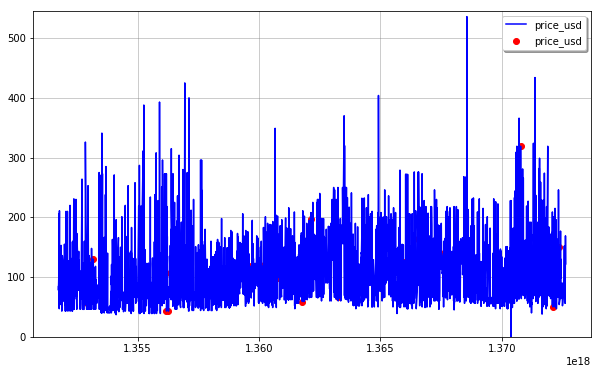

In [64]:
# Import module for oneclassSVM
from sklearn.svm import OneClassSVM

data=df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

# Scale the data
scaler=StandardScaler()
np_scaled=scaler.fit_transform(data)
data=pd.DataFrame(np_scaled)

# Train oneclassSVM
model=OneClassSVM(nu=outliers_fraction, kernel='rbf', gamma=0.01)
model.fit(data)

df['anomaly3']=pd.Series(model.predict(data))

fig, ax = plt.subplots(figsize=(10,6))
a=df.loc[df['anomaly3'] == -1, ['date_time_int', 'price_usd']] # anomaly

# Plot anomalies in time series view
ax.plot(df['date_time_int'], df['price_usd'], color='blue')
ax.scatter(a['date_time_int'], a['price_usd'], color='red')

plt.grid(which='major', color='grey', alpha=0.5)
plt.ylim(0, np.max(df['price_usd']+10))
plt.legend(shadow=True, loc='best')

plt.show()

<h2>Anomaly Detection using Gaussian Distribution</h2>
<p>
Gaussian distribution is also called normal distribution. We will be using the Gaussian distribution to develop an anomaly detection algorithm, that is, we’ll assume that our data are normally distributed. This’s an assumption that cannot hold true for all data sets, yet when it does, it proves an effective method for spotting outliers.
</p>

<p>Scikit-Learn’s <code>covariance.EllipticEnvelope</code> is a function that tries to figure out the key parameters of our data’s general distribution by assuming that our entire data is an expression of an underlying multivariate Gaussian distribution. The process like so:
<li>
<ul>- Create two different data sets based on categories defined earlier, — search_Sat_night, Search_Non_Sat_night.</ul>
    <ul>- Apply <code>EllipticEnvelope</code>(gaussian distribution) at each categories.</ul>
    <ul>- We set <code>contamination</code> parameter which is the proportion of the outliers present in our data set.</ul>
    <ul>- We use <code>decision_function</code> to compute the decision function of the given observations. It is equal to the shifted <i>Mahalanobis distances</i>. The threshold for being an outlier is <b>0</b>, which ensures a compatibility with other outlier detection algorithms.</ul>
    <ul>- The <code>predict(X_train)</code> predict the labels (<b>1</b> ,<i>normal</i>, <b>-1</b> <i>anomaly</i>) of X_train according to the fitted model.</ul></li>
</p>

c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


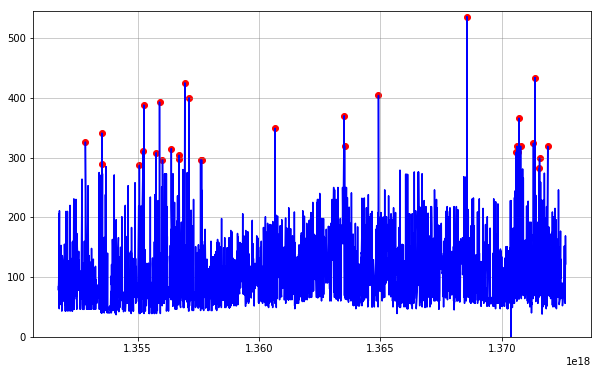

In [73]:
# Import module for Gaussian
from sklearn.covariance import EllipticEnvelope

# Build subsets as classes
df_class0=df.loc[df['srch_saturday_night_bool']==0, 'price_usd']
df_class1=df.loc[df['srch_saturday_night_bool']==1, 'price_usd']

envelope=EllipticEnvelope(contamination=outliers_fraction)

# Generate Train set for Class 0
X_train=df_class0.values.reshape(-1, 1)
envelope.fit(X_train)
df_class0=pd.DataFrame(df_class0)
df_class0['deviation']=envelope.decision_function(X_train)
df_class0['anomaly']=envelope.predict(X_train)

# Generate Train set for Class 1
envelope=EllipticEnvelope(contamination=outliers_fraction)
X_train=df_class1.values.reshape(-1, 1)
envelope.fit(X_train)
df_class1=pd.DataFrame(df_class1)
df_class1['deviation']=envelope.decision_function(X_train)
df_class1['anomaly']=envelope.predict(X_train)

# Merge Classes
df_class=pd.concat([df_class0, df_class1])
df['anomaly5']=df_class['anomaly']

fig, ax = plt.subplots(figsize=(10,6))
a=df.loc[df['anomaly5'] == -1, ('date_time_int', 'price_usd')] # anomaly
ax.plot(df['date_time_int'], df['price_usd'], color='blue')
ax.scatter(a['date_time_int'], a['price_usd'], color='red')

plt.grid(which='major', color='grey', alpha=0.5)
plt.ylim(0, np.max(df['price_usd']+10))

plt.show()

<h2>Final Word</h2>
<p>We have done price anomaly detection with four different methods. Because our anomaly detection is unsupervised learning.</p>
<p>Prepared by Vytautas Bielinskas, 2019</p>